In [1]:
import nltk
import pandas as pd
import numpy as np

In [2]:
nltk.download('book')

[nltk_data] Downloading collection 'book'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     C:\Users\NTX550\AppData\Roaming\nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package brown to
[nltk_data]    |     C:\Users\NTX550\AppData\Roaming\nltk_data...
[nltk_data]    |   Package brown is already up-to-date!
[nltk_data]    | Downloading package chat80 to
[nltk_data]    |     C:\Users\NTX550\AppData\Roaming\nltk_data...
[nltk_data]    |   Package chat80 is already up-to-date!
[nltk_data]    | Downloading package cmudict to
[nltk_data]    |     C:\Users\NTX550\AppData\Roaming\nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package conll2000 to
[nltk_data]    |     C:\Users\NTX550\AppData\Roaming\nltk_data...
[nltk_data]    |   Package conll2000 is already up-to-date!
[nltk_data]    | Downloading package conll2002 to
[nltk_data]    |     C:\Users\NTX550\App

True

In [3]:
from nltk.book import *

*** Introductory Examples for the NLTK Book ***
Loading text1, ..., text9 and sent1, ..., sent9
Type the name of the text or sentence to view it.
Type: 'texts()' or 'sents()' to list the materials.
text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908


In [4]:
nltk.corpus.gutenberg.fileids()

['austen-emma.txt',
 'austen-persuasion.txt',
 'austen-sense.txt',
 'bible-kjv.txt',
 'blake-poems.txt',
 'bryant-stories.txt',
 'burgess-busterbrown.txt',
 'carroll-alice.txt',
 'chesterton-ball.txt',
 'chesterton-brown.txt',
 'chesterton-thursday.txt',
 'edgeworth-parents.txt',
 'melville-moby_dick.txt',
 'milton-paradise.txt',
 'shakespeare-caesar.txt',
 'shakespeare-hamlet.txt',
 'shakespeare-macbeth.txt',
 'whitman-leaves.txt']

In [5]:
emma_raw = nltk.corpus.gutenberg.raw('austen-emma.txt')
print(emma_raw)

[Emma by Jane Austen 1816]

VOLUME I

CHAPTER I


Emma Woodhouse, handsome, clever, and rich, with a comfortable home
and happy disposition, seemed to unite some of the best blessings
of existence; and had lived nearly twenty-one years in the world
with very little to distress or vex her.

She was the youngest of the two daughters of a most affectionate,
indulgent father; and had, in consequence of her sister's marriage,
been mistress of his house from a very early period.  Her mother
had died too long ago for her to have more than an indistinct
remembrance of her caresses; and her place had been supplied
by an excellent woman as governess, who had fallen little short
of a mother in affection.

Sixteen years had Miss Taylor been in Mr. Woodhouse's family,
less as a governess than a friend, very fond of both daughters,
but particularly of Emma.  Between _them_ it was more the intimacy
of sisters.  Even before Miss Taylor had ceased to hold the nominal
office of governess, the mildness o

In [6]:
from nltk.tokenize import sent_tokenize, word_tokenize, RegexpTokenizer

In [7]:
st = sent_tokenize(emma_raw[:1000])
len(st)

6

In [8]:
st

['[Emma by Jane Austen 1816]\n\nVOLUME I\n\nCHAPTER I\n\n\nEmma Woodhouse, handsome, clever, and rich, with a comfortable home\nand happy disposition, seemed to unite some of the best blessings\nof existence; and had lived nearly twenty-one years in the world\nwith very little to distress or vex her.',
 "She was the youngest of the two daughters of a most affectionate,\nindulgent father; and had, in consequence of her sister's marriage,\nbeen mistress of his house from a very early period.",
 'Her mother\nhad died too long ago for her to have more than an indistinct\nremembrance of her caresses; and her place had been supplied\nby an excellent woman as governess, who had fallen little short\nof a mother in affection.',
 "Sixteen years had Miss Taylor been in Mr. Woodhouse's family,\nless as a governess than a friend, very fond of both daughters,\nbut particularly of Emma.",
 'Between _them_ it was more the intimacy\nof sisters.',
 'Even before Miss Taylor had ceased to hold the nominal

In [9]:
print(st[0])

[Emma by Jane Austen 1816]

VOLUME I

CHAPTER I


Emma Woodhouse, handsome, clever, and rich, with a comfortable home
and happy disposition, seemed to unite some of the best blessings
of existence; and had lived nearly twenty-one years in the world
with very little to distress or vex her.


In [10]:
print(st[1])


She was the youngest of the two daughters of a most affectionate,
indulgent father; and had, in consequence of her sister's marriage,
been mistress of his house from a very early period.


In [11]:
emma_raw[50:100]

'Emma Woodhouse, handsome, clever, and rich, with a'

In [12]:
word_tokenize( emma_raw[50:100])

['Emma',
 'Woodhouse',
 ',',
 'handsome',
 ',',
 'clever',
 ',',
 'and',
 'rich',
 ',',
 'with',
 'a']

In [13]:
# soynlp: 한글도 정규식 이용한 tokenizing 사용 가능

In [14]:
regToken = RegexpTokenizer( '\w+' )# [a-zA-Z0-9_]+ ==> \w
regToken.tokenize( emma_raw[50:100])

['Emma', 'Woodhouse', 'handsome', 'clever', 'and', 'rich', 'with', 'a']

In [15]:
s = '연말 연시 올 한해, 모두'
r = RegexpTokenizer( '\w+' ) # 파이썬 \w: [a-zA-Z0-9가-힣_]+
r.tokenize(s)

['연말', '연시', '올', '한해', '모두']

In [16]:
from nltk.stem import PorterStemmer, LancasterStemmer

In [17]:
st1 = PorterStemmer()
st2 = LancasterStemmer()

In [18]:
words = ['fly', 'flies', 'flying', 'flew', 'flown']
print('proter stem',  [st1.stem(w) for w in words])
print('proter stem',  [st2.stem(w) for w in words])

proter stem ['fli', 'fli', 'fli', 'flew', 'flown']
proter stem ['fly', 'fli', 'fly', 'flew', 'flown']


In [19]:
from nltk.stem import WordNetLemmatizer

In [20]:
lm = WordNetLemmatizer()
print('lemma', [lm.lemmatize(w) for w in words])

lemma ['fly', 'fly', 'flying', 'flew', 'flown']


In [21]:
wordss = ['die', 'dies', 'died', 'dead']
lm = WordNetLemmatizer()
print('stem', [st1.stem(w) for w in wordss])
print('lemma', [lm.lemmatize(w) for w in wordss])


stem ['die', 'die', 'die', 'dead']
lemma ['die', 'dy', 'died', 'dead']


In [22]:
from konlpy.tag import Okt

In [23]:
s = '나는 자랑스런 태극기 앞에 조국과 민족의 무궁한 영광을 위하여'

In [24]:
okt= Okt()

In [25]:
okt.pos(s, stem=True) #stem 원형 복원

[('나', 'Noun'),
 ('는', 'Josa'),
 ('자랑스럽다', 'Adjective'),
 ('태극기', 'Noun'),
 ('앞', 'Noun'),
 ('에', 'Josa'),
 ('조국', 'Noun'),
 ('과', 'Josa'),
 ('민족', 'Noun'),
 ('의', 'Josa'),
 ('무궁', 'Noun'),
 ('한', 'Josa'),
 ('영광', 'Noun'),
 ('을', 'Josa'),
 ('위', 'Noun'),
 ('하다', 'Verb')]

### 품사태깅

In [26]:
from nltk.tag import pos_tag

In [27]:
nltk.help.upenn_tagset()

$: dollar
    $ -$ --$ A$ C$ HK$ M$ NZ$ S$ U.S.$ US$
'': closing quotation mark
    ' ''
(: opening parenthesis
    ( [ {
): closing parenthesis
    ) ] }
,: comma
    ,
--: dash
    --
.: sentence terminator
    . ! ?
:: colon or ellipsis
    : ; ...
CC: conjunction, coordinating
    & 'n and both but either et for less minus neither nor or plus so
    therefore times v. versus vs. whether yet
CD: numeral, cardinal
    mid-1890 nine-thirty forty-two one-tenth ten million 0.5 one forty-
    seven 1987 twenty '79 zero two 78-degrees eighty-four IX '60s .025
    fifteen 271,124 dozen quintillion DM2,000 ...
DT: determiner
    all an another any both del each either every half la many much nary
    neither no some such that the them these this those
EX: existential there
    there
FW: foreign word
    gemeinschaft hund ich jeux habeas Haementeria Herr K'ang-si vous
    lutihaw alai je jour objets salutaris fille quibusdam pas trop Monte
    terram fiche oui corporis ...
IN: preposition or

In [28]:
sentence = 'Emma refused to permit us to obtain the refuse permit'
pos_tag(word_tokenize(sentence))

[('Emma', 'NNP'),
 ('refused', 'VBD'),
 ('to', 'TO'),
 ('permit', 'VB'),
 ('us', 'PRP'),
 ('to', 'TO'),
 ('obtain', 'VB'),
 ('the', 'DT'),
 ('refuse', 'NN'),
 ('permit', 'NN')]

In [29]:
## 명사, 고유명사만 추춯
p = pos_tag(word_tokenize(sentence))
[i for i in p if i[1] in ['NN', 'NNP', 'NNPS', 'NNS']]

[('Emma', 'NNP'), ('refuse', 'NN'), ('permit', 'NN')]

In [30]:
import re

In [31]:
[i for i in p if re.compile('NN').search(i[1])]

[('Emma', 'NNP'), ('refuse', 'NN'), ('permit', 'NN')]

In [32]:
from nltk import Text

In [33]:
regToken = RegexpTokenizer( '\w+' )

In [34]:
tok = regToken.tokenize(emma_raw) #특수기호 빼고 tokenize

In [35]:
txt = Text(tok)

In [36]:
txt.vocab()

FreqDist({'to': 5183, 'the': 4844, 'and': 4672, 'of': 4279, 'I': 3178, 'a': 3004, 'was': 2385, 'her': 2381, 'it': 2128, 'in': 2118, ...})

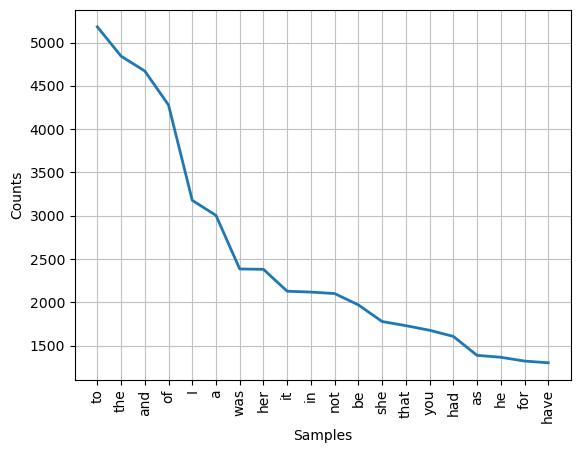

<AxesSubplot: xlabel='Samples', ylabel='Counts'>

In [37]:
txt.plot(20)

### stop word 제거( 불용어)

In [38]:
from nltk.corpus import stopwords

In [39]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\NTX550\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [40]:
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [42]:
wt = word_tokenize(emma_raw)

In [43]:
[n for n in wt if n not in stopwords.words('english')]

['[',
 'Emma',
 'Jane',
 'Austen',
 '1816',
 ']',
 'VOLUME',
 'I',
 'CHAPTER',
 'I',
 'Emma',
 'Woodhouse',
 ',',
 'handsome',
 ',',
 'clever',
 ',',
 'rich',
 ',',
 'comfortable',
 'home',
 'happy',
 'disposition',
 ',',
 'seemed',
 'unite',
 'best',
 'blessings',
 'existence',
 ';',
 'lived',
 'nearly',
 'twenty-one',
 'years',
 'world',
 'little',
 'distress',
 'vex',
 '.',
 'She',
 'youngest',
 'two',
 'daughters',
 'affectionate',
 ',',
 'indulgent',
 'father',
 ';',
 ',',
 'consequence',
 'sister',
 "'s",
 'marriage',
 ',',
 'mistress',
 'house',
 'early',
 'period',
 '.',
 'Her',
 'mother',
 'died',
 'long',
 'ago',
 'indistinct',
 'remembrance',
 'caresses',
 ';',
 'place',
 'supplied',
 'excellent',
 'woman',
 'governess',
 ',',
 'fallen',
 'little',
 'short',
 'mother',
 'affection',
 '.',
 'Sixteen',
 'years',
 'Miss',
 'Taylor',
 'Mr.',
 'Woodhouse',
 "'s",
 'family',
 ',',
 'less',
 'governess',
 'friend',
 ',',
 'fond',
 'daughters',
 ',',
 'particularly',
 'Emma',
 '.',


In [44]:
tok = regToken.tokenize(emma_raw)
[n for n in tok if n not in stopwords.words('english')]

['Emma',
 'Jane',
 'Austen',
 '1816',
 'VOLUME',
 'I',
 'CHAPTER',
 'I',
 'Emma',
 'Woodhouse',
 'handsome',
 'clever',
 'rich',
 'comfortable',
 'home',
 'happy',
 'disposition',
 'seemed',
 'unite',
 'best',
 'blessings',
 'existence',
 'lived',
 'nearly',
 'twenty',
 'one',
 'years',
 'world',
 'little',
 'distress',
 'vex',
 'She',
 'youngest',
 'two',
 'daughters',
 'affectionate',
 'indulgent',
 'father',
 'consequence',
 'sister',
 'marriage',
 'mistress',
 'house',
 'early',
 'period',
 'Her',
 'mother',
 'died',
 'long',
 'ago',
 'indistinct',
 'remembrance',
 'caresses',
 'place',
 'supplied',
 'excellent',
 'woman',
 'governess',
 'fallen',
 'little',
 'short',
 'mother',
 'affection',
 'Sixteen',
 'years',
 'Miss',
 'Taylor',
 'Mr',
 'Woodhouse',
 'family',
 'less',
 'governess',
 'friend',
 'fond',
 'daughters',
 'particularly',
 'Emma',
 'Between',
 '_them_',
 'intimacy',
 'sisters',
 'Even',
 'Miss',
 'Taylor',
 'ceased',
 'hold',
 'nominal',
 'office',
 'governess',
 'm

In [ ]:
##emma_raw 문자열에서 불용어를 제거한 명사, 고유명사를 추출하고 text plot, wordcloud를 그리시오. 

In [81]:
tok = regToken.tokenize(emma_raw)

In [82]:
sw = stopwords.words('english')
sw.extend(['Mr.', 'Mrs.', 'Miss', 'thing', 'Mr', 'Mrs'])
sw

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [83]:
toksw = [n for n in tok if n not in sw]

In [84]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['font.family'] = 'Malgun Gothic' #한글 깨지지 않기 위해 폰트 설정
matplotlib.rcParams['axes.unicode_minus'] = False 

In [91]:
## 명사, 고유명사만 추출
p = pos_tag(toksw)
nouns = [i[0] for i in p if re.compile('NN').search(i[1])]
print(nouns)

['Emma', 'Jane', 'Austen', 'VOLUME', 'Emma', 'Woodhouse', 'clever', 'home', 'disposition', 'blessings', 'existence', 'years', 'world', 'distress', 'daughters', 'indulgent', 'father', 'consequence', 'sister', 'marriage', 'mistress', 'house', 'period', 'mother', 'remembrance', 'caresses', 'woman', 'governess', 'mother', 'affection', 'Sixteen', 'years', 'Taylor', 'Woodhouse', 'family', 'friend', 'fond', 'daughters', 'Emma', 'Between', '_them_', 'intimacy', 'sisters', 'Taylor', 'office', 'governess', 'mildness', 'restraint', 'authority', 'friend', 'Emma', 'Taylor', 'judgment', 'evils', 'Emma', 'situation', 'power', 'way', 'disposition', 'disadvantages', 'enjoyments', 'danger', 'means', 'misfortunes', 'Sorrow', 'shape', 'consciousness', 'Taylor', 'Taylor', 'loss', 'grief', 'day', 'friend', 'Emma', 'continuance', 'wedding', 'bride', 'people', 'dine', 'cheer', 'father', 'dinner', 'sit', 'event', 'promise', 'happiness', 'Weston', 'man', 'character', 'fortune', 'age', 'manners', 'friendship', '

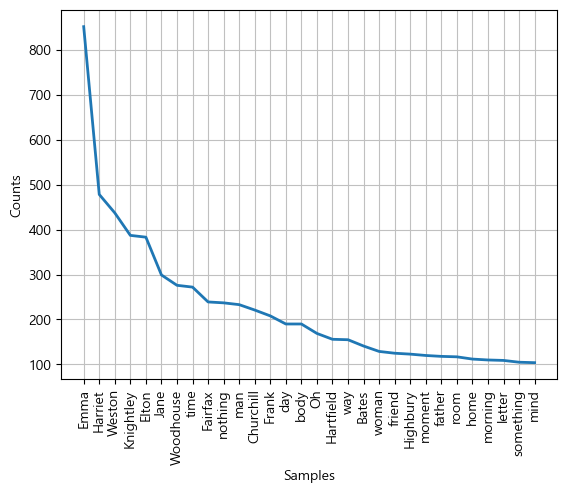

In [92]:
txtEng = Text(nouns)
txtEng.plot(30)
plt.show()

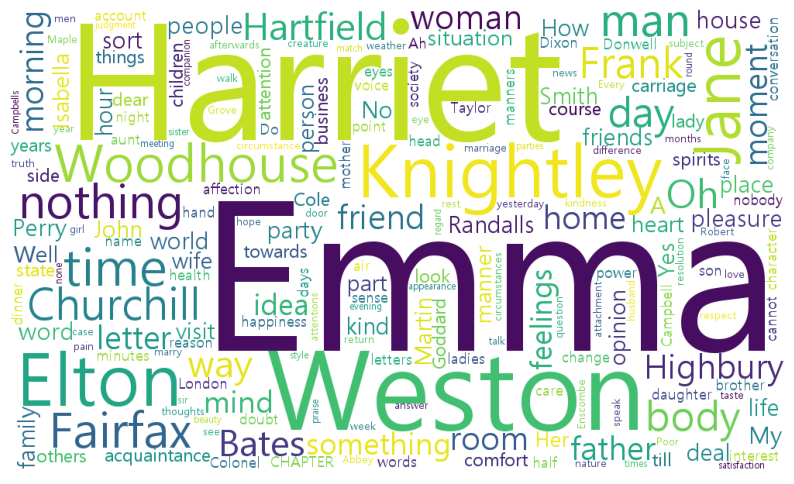

In [93]:
font_path = 'c:\Windows\Fonts\malgun.ttf'
wc = WordCloud(font_path=font_path, width=1000, height=600,
        background_color='white' )
gen = wc.generate_from_frequencies( txtEng.vocab() )
plt.figure( figsize=(10,8) )
plt.imshow( gen )
plt.axis('off')
plt.show()